# গণনার পরমাণু

একটি কোয়ান্টাম কম্পিউটার প্রোগ্রামিং এখন এমন কিছু যা যে কেউ নিজের ঘরে বসেই করতে পারে।

কিন্তু কি তৈরি করবেন? যাইহোক একটি কোয়ান্টাম প্রোগ্রাম কি? আসলে, কোয়ান্টাম কম্পিউটার কি?

স্ট্যান্ডার্ড ডিজিটাল কম্পিউটারের সাথে তুলনা করে এই প্রশ্নের উত্তর দেওয়া যেতে পারে। দুর্ভাগ্যবশত, অধিকাংশ মানুষ আসলে বুঝতে পারে না কিভাবে ডিজিটাল কম্পিউটার কাজ করে। এই নিবন্ধে, আমরা এই ডিভাইসগুলির পিছনে মূল নীতিগুলি দেখব। আমাদের পরবর্তীতে কোয়ান্টাম কম্পিউটিংয়ে রূপান্তরিত করতে সাহায্য করার জন্য, আমরা কোয়ান্টামের জন্য যে সরঞ্জামগুলি ব্যবহার করব সেই একই সরঞ্জামগুলি ব্যবহার করে এটি করব।

নীচে কিছু পাইথন কোড রয়েছে যদি আমরা এই পৃষ্ঠায় কোডটি ব্যবহার করতে চাই তবে আমাদের চালাতে হবে:

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

## 1. তথ্য বিটে বিভক্ত করা<a id="bits"></a>

আমাদের প্রথম যে জিনিসটি জানতে হবে তা হল বিটের ধারণা। এগুলি বিশ্বের সহজতম বর্ণমালা হতে ডিজাইন করা হয়েছে৷ শুধুমাত্র দুটি অক্ষর, 0 এবং 1 দিয়ে, আমরা যেকোন তথ্য উপস্থাপন করতে পারি।

একটি উদাহরণ হল সংখ্যা। আপনি সম্ভবত দশটি সংখ্যা 0, 1, 2, 3, 4, 5, 6, 7, 8 এবং 9 সংখ্যার একটি স্ট্রিংয়ের মাধ্যমে একটি সংখ্যাকে উপস্থাপন করতে অভ্যস্ত। এই সংখ্যার স্ট্রিংয়ে, প্রতিটি সংখ্যা প্রতিনিধিত্ব করে সংখ্যাটি কতবার দশের একটি নির্দিষ্ট শক্তি রয়েছে। উদাহরণস্বরূপ, যখন আমরা 9213 লিখি, আমরা মানে

$$ 9000 + 200 + 10 + 3 $$

বা, এমনভাবে প্রকাশ করা হয়েছে যা দশের ক্ষমতার উপর জোর দেয়

$$ (9\times10^3) + (2\times10^2) + (1\times10^1) + (3\times10^0) $$

যদিও আমরা সাধারণত 10 নম্বরের উপর ভিত্তি করে এই সিস্টেমটি ব্যবহার করি, আমরা অন্য যেকোনো সংখ্যার ভিত্তিতে একটি ব্যবহার করতে পারি। বাইনারি সংখ্যা পদ্ধতি, উদাহরণস্বরূপ, দুই নম্বরের উপর ভিত্তি করে। এর অর্থ হল দুটি অক্ষর 0 এবং 1 ব্যবহার করে সংখ্যাগুলিকে দুটির ঘাতের গুণিতক হিসাবে প্রকাশ করা। উদাহরণস্বরূপ, 9213 10001111111101 হয়ে যায়, যেহেতু

$$ \begin{aligned} 9213  &amp;= (1 \times 2^{13}) + (0 \times 2^{12}) + (0 \times 2^{11}) + (0 \times 2^{10}) \ &amp;+ (1 \times 2^9) + (1 \times 2^8) + (1 \times 2^7) + (1 \times 2^6) \ &amp;+ (1 \times 2^5) + (1 \times 2^4) + (1 \times 2^3) + (1 \times 2^2) \ &amp;+ (0 \times 2^1) + (1 \times 2^0) \end{aligned} $$

এতে আমরা 10, 100, 1000 ইত্যাদির পরিবর্তে 2, 4, 8, 16, 32, ইত্যাদির গুণিতক হিসাবে সংখ্যা প্রকাশ করছি।


In [ ]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

বিটের এই স্ট্রিংগুলি, যা বাইনারি স্ট্রিং নামে পরিচিত, শুধুমাত্র সংখ্যার চেয়ে বেশি প্রতিনিধিত্ব করতে ব্যবহার করা যেতে পারে। উদাহরণস্বরূপ, বিট ব্যবহার করে যে কোনও পাঠ্যকে উপস্থাপন করার একটি উপায় রয়েছে। আপনি যে কোনো অক্ষর, সংখ্যা বা বিরাম চিহ্ন ব্যবহার করতে চান, আপনি [এই টেবিলটি](https://www.ibm.com/support/knowledgecenter/en/ssw_aix_72/com.ibm.aix.networkcomm/conversion_table.htm) ব্যবহার করে সর্বাধিক আট বিটের একটি সংশ্লিষ্ট স্ট্রিং খুঁজে পেতে পারেন। যদিও এগুলি বেশ স্বেচ্ছাচারী, এটি একটি ব্যাপকভাবে সম্মত মানদণ্ড। প্রকৃতপক্ষে, এই নিবন্ধটি ইন্টারনেটের মাধ্যমে আপনার কাছে প্রেরণ করতে ব্যবহৃত হয়েছিল।

এইভাবে কম্পিউটারে সমস্ত তথ্য উপস্থাপন করা হয়। সংখ্যা, অক্ষর, চিত্র বা শব্দ হোক না কেন, এটি সবই বাইনারি স্ট্রিং আকারে বিদ্যমান।

আমাদের স্ট্যান্ডার্ড ডিজিটাল কম্পিউটারের মতো, কোয়ান্টাম কম্পিউটারগুলিও এই একই মৌলিক ধারণার উপর ভিত্তি করে তৈরি। প্রধান পার্থক্য হল তারা *qubits* ব্যবহার করে, কোয়ান্টাম মেকানিক্সে বিটের একটি এক্সটেনশন। এই পাঠ্যপুস্তকের বাকি অংশে, আমরা কিউবিটগুলি কী, তারা কী করতে পারে এবং কীভাবে তারা এটি করে তা অন্বেষণ করব। এই বিভাগে, তবে, আমরা মোটেই কোয়ান্টাম সম্পর্কে কথা বলছি না। সুতরাং, আমরা শুধু qubits ব্যবহার করি যেন তারা বিট ছিল।

<!-- ::: q-block.exercise -->

## অনুশীলন

বাক্যগুলো সম্পন্ন করুন:

1. দশমিকে "5" সংখ্যাটি বাইনারিতে [[101|11001|110|001]]।
2. যদি আমাদের কম্পিউটারে 1 বিট থাকে তবে এটি [[2|1|3|4]] বিভিন্ন অবস্থায় থাকতে পারে।
3. আমাদের কম্পিউটারে যদি 2 বিট থাকে, তবে এটি বিভিন্ন অবস্থায় [[4|3|2|8]] থাকতে পারে।
4. যদি আমাদের কম্পিউটারে 8 বিট থাকে তবে এটি [[256|128|342]] বিভিন্ন অবস্থায় থাকতে পারে।
5. আপনার যদি $n$ বিট থাকে তবে সেগুলি [[$2^n$|$n×2$|$n^2$]] বিভিন্ন রাজ্যে থাকতে পারে।

<!-- ::: -->


## 2. একটি ডায়াগ্রাম হিসাবে গণনা<a id="diagram"></a>

আমরা কিউবিট বা বিট ব্যবহার করি না কেন, আমাদের প্রয়োজনীয় ইনপুটগুলিকে আমাদের প্রয়োজনীয় আউটপুটে পরিণত করার জন্য আমাদের সেগুলিকে ম্যানিপুলেট করতে হবে। খুব কম বিট সহ সহজ প্রোগ্রামগুলির জন্য, *সার্কিট ডায়াগ্রাম* নামে পরিচিত একটি ডায়াগ্রামে এই প্রক্রিয়াটি উপস্থাপন করা কার্যকর। এগুলোর বাম দিকে ইনপুট, ডানদিকে আউটপুট এবং এর মধ্যে আর্কেন চিহ্ন দ্বারা উপস্থাপিত ক্রিয়াকলাপ রয়েছে। এই অপারেশনগুলিকে 'গেট' বলা হয়, বেশিরভাগ ঐতিহাসিক কারণে।

স্ট্যান্ডার্ড, বিট-ভিত্তিক কম্পিউটারগুলির জন্য একটি সার্কিট কেমন দেখায় তার একটি উদাহরণ এখানে। আপনি এটা কি বুঝতে আশা করা হয় না. এটি আপনাকে এই সার্কিটগুলি দেখতে কেমন তা কেবল একটি ধারণা দিতে হবে।

![image1](images/classical_circuit.png)

কোয়ান্টাম কম্পিউটারের জন্য, আমরা একই মৌলিক ধারণা ব্যবহার করি তবে কীভাবে ইনপুট, আউটপুট এবং অপারেশনের জন্য ব্যবহৃত চিহ্নগুলিকে উপস্থাপন করতে হয় তার জন্য ভিন্ন নিয়ম রয়েছে। এখানে কোয়ান্টাম সার্কিট যা উপরের মত একই প্রক্রিয়ার প্রতিনিধিত্ব করে।

![image2](https://github.com/Qiskit/platypus/blob/main/translations/bn/ch-states/images/quantum_circuit.png?raw=true)

এই অংশের বাকি অংশে, আমরা কীভাবে সার্কিট তৈরি করতে হয় তা ব্যাখ্যা করব। শেষে, আপনি উপরের সার্কিটটি কীভাবে তৈরি করবেন, এটি কী করে এবং কেন এটি দরকারী তা জানতে পারবেন।

## 3. আপনার প্রথম কোয়ান্টাম সার্কিট<a id="first-circuit"></a>

একটি সার্কিটে, আমাদের সাধারণত তিনটি কাজ করতে হবে: প্রথমে, ইনপুট এনকোড করুন, তারপর কিছু প্রকৃত গণনা করুন এবং অবশেষে একটি আউটপুট বের করুন। আপনার প্রথম কোয়ান্টাম সার্কিটের জন্য, আমরা এই কাজের শেষের দিকে ফোকাস করব। আমরা আটটি কিউবিট এবং আটটি আউটপুট সহ একটি সার্কিট তৈরি করে শুরু করি।

In [3]:
qc_output = QuantumCircuit(8)

এই সার্কিট, যাকে আমরা `qc_output` , QuantumCircuit ব্যবহার করে `QuantumCircuit` তৈরি করেছে। কোয়ান্টাম সার্কিট একটি যুক্তি হিসাবে কোয়ান্টাম সার্কিটে `QuantumCircuit` সংখ্যা নেয়।

একটি কোয়ান্টাম সার্কিটে আউটপুট নিষ্কাশন করা হয় `measure_all()` নামক একটি অপারেশন ব্যবহার করে। প্রতিটি পরিমাপ একটি নির্দিষ্ট আউটপুট বিটে একটি আউটপুট দিতে একটি নির্দিষ্ট কিউবিটকে বলে। `qc_output.measure_all()` কমান্ডটি সার্কিট `qc_output` এর প্রতিটি qubit-এ একটি পরিমাপ যোগ করে এবং আউটপুট লেখার জন্য কিছু ক্লাসিক্যাল বিটও যোগ করে।

In [4]:
qc_output.measure_all()

এখন যে আমাদের সার্কিটে কিছু আছে, আসুন এটি একবার দেখে নেওয়া যাক।

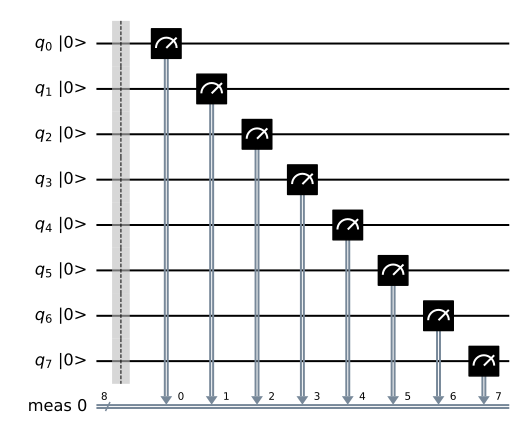

In [5]:
qc_output.draw(initial_state=True) 

Qubits সর্বদা আউটপুট `0` দিতে আরম্ভ করা হয়। যেহেতু আমরা উপরের সার্কিটে আমাদের কিউবিটগুলির সাথে কিছু করি না, তাই আমরা যখন তাদের পরিমাপ করব তখন আমরা ঠিক এই ফলাফলটি পাব। আমরা অনেকবার সার্কিট চালিয়ে এবং হিস্টোগ্রামে ফলাফল প্লট করে এটি দেখতে পারি। আমরা দেখতে পাব যে ফলাফল সর্বদা `00000000` : প্রতিটি qubit থেকে একটি `0` ।

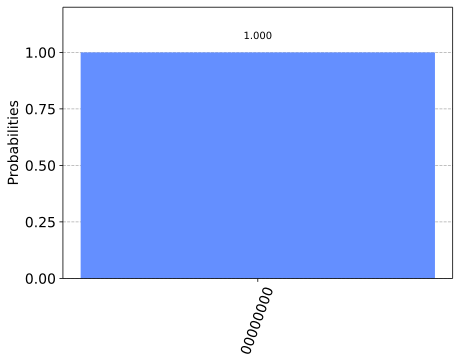

In [6]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

অনেকবার চালানো এবং ফলাফল হিস্টোগ্রাম হিসাবে দেখানোর কারণ হল কোয়ান্টাম কম্পিউটারের ফলাফলে কিছুটা এলোমেলোতা থাকতে পারে। এই ক্ষেত্রে, যেহেতু আমরা কিছু কোয়ান্টাম করছি না, আমরা নিশ্চিততার সাথে শুধুমাত্র `00000000` ফলাফল পাই।

মনে রাখবেন যে এই ফলাফলটি একটি কোয়ান্টাম সিমুলেটর থেকে এসেছে, যা একটি আদর্শ কম্পিউটার যা একটি আদর্শ কোয়ান্টাম কম্পিউটার কী করবে তা গণনা করে। সিমুলেশনগুলি শুধুমাত্র অল্প সংখ্যক কিউবিট (~30 কিউবিট) এর জন্যই সম্ভব, কিন্তু তবুও আপনার প্রথম কোয়ান্টাম সার্কিট ডিজাইন করার সময় এগুলি খুব দরকারী টুল। একটি বাস্তব ডিভাইসে চালানোর জন্য আপনাকে কেবল `Aer.get_backend('aer_simulator')` ডিভাইসটির ব্যাকএন্ড অবজেক্টের সাথে প্রতিস্থাপন করতে হবে যা আপনি ব্যবহার করতে চান। 

## 4. উদাহরণ: একটি অ্যাডার সার্কিট তৈরি করা<a id="adder"></a>

### 4.1 একটি ইনপুট এনকোডিং<a id="encoding"></a>

এখন দেখা যাক কিভাবে একটি ভিন্ন বাইনারি স্ট্রিংকে ইনপুট হিসেবে এনকোড করা যায়। এর জন্য, আমাদের প্রয়োজন যা নট গেট হিসাবে পরিচিত। এটি সবচেয়ে মৌলিক অপারেশন যা আপনি একটি কম্পিউটারে করতে পারেন। এটি সহজভাবে বিট মানকে ফ্লিপ করে: `0` হয়ে যায় `1` এবং `1` হয়ে যায় `0` । qubits জন্য, এটি `x` নামক একটি অপারেশন যা NOT এর কাজ করে।

নীচে আমরা এনকোডিংয়ের কাজের জন্য নিবেদিত একটি নতুন সার্কিট তৈরি করি এবং এটিকে `qc_encode` । আপাতত, আমরা শুধুমাত্র qubits সংখ্যা নির্দিষ্ট.

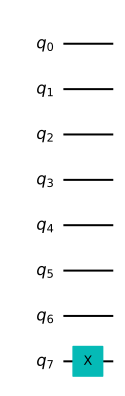

In [7]:
qc_encode = QuantumCircuit(8)
qc_encode.x(7)
qc_encode.draw()

আমাদের আগে থেকে থাকা সার্কিট ব্যবহার করে ফলাফল বের করা যেতে পারে: `qc_output` ।

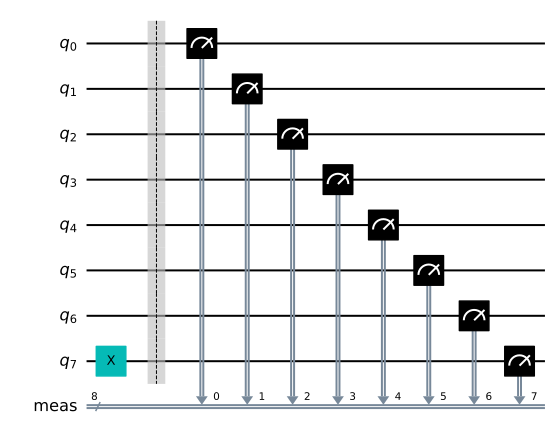

In [8]:
qc_encode.measure_all()
qc_encode.draw()

এখন আমরা সম্মিলিত সার্কিট চালাতে পারি এবং ফলাফল দেখতে পারি।

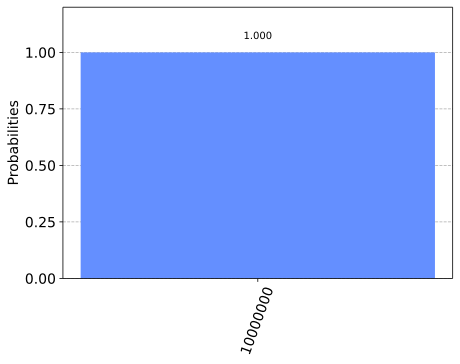

In [9]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

এখন আমাদের কম্পিউটার এর পরিবর্তে স্ট্রিং `10000000` আউটপুট করে।

আমরা যে বিটটি ফ্লিপ করেছি, যা qubit 7 থেকে আসে, স্ট্রিংয়ের বাম দিকে থাকে। কারণ কিস্কিট ডান থেকে বামে একটি স্ট্রিং-এ বিট সংখ্যা করে। কেউ কেউ তাদের বিটগুলিকে অন্যভাবে সংখ্যা করতে পছন্দ করে, তবে কিস্কিট সিস্টেমের অবশ্যই এর সুবিধা রয়েছে যখন আমরা সংখ্যাগুলিকে উপস্থাপন করার জন্য বিটগুলি ব্যবহার করি। বিশেষভাবে, এর মানে হল যে qubit 7 আমাদের বলছে আমাদের সংখ্যায় কত `2^7` s আছে। সুতরাং এই বিটটি ফ্লিপ করে, আমরা এখন আমাদের সাধারণ 8-বিট কম্পিউটারে সংখ্যাটি [[128|256|64|32]] লিখেছি।

এখন নিজের জন্য অন্য নম্বর লেখার চেষ্টা করুন। আপনি আপনার বয়স করতে পারেন, উদাহরণস্বরূপ. বাইনারিতে সংখ্যাটি কেমন দেখায় তা খুঁজে বের করার জন্য শুধু একটি সার্চ ইঞ্জিন ব্যবহার করুন (যদি এটি একটি '0b' অন্তর্ভুক্ত করে তবে এটিকে উপেক্ষা করুন), এবং তারপরে আপনার বয়স 128-এর কম হলে বাম দিকে কিছু 0s যোগ করুন।

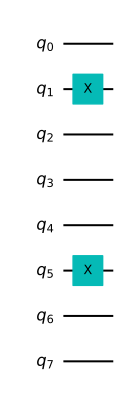

In [10]:
qc_encode = QuantumCircuit(8)
qc_encode.x(1)
qc_encode.x(5)

qc_encode.draw()

এখন আমরা জানি কিভাবে কম্পিউটারে তথ্য এনকোড করতে হয়। পরবর্তী ধাপ হল এটি প্রক্রিয়া করা: আমরা এনকোড করেছি এমন একটি ইনপুট নিতে এবং এটিকে আমাদের প্রয়োজনীয় আউটপুটে পরিণত করতে হবে।

### 4.2 কিভাবে যোগ করতে হয় তা মনে রাখা<a id="remembering-add"></a>

ইনপুটগুলিকে আউটপুটে পরিণত করার জন্য, আমাদের একটি সমস্যা সমাধানের প্রয়োজন। আসুন কিছু মৌলিক গণিত করি। প্রাথমিক বিদ্যালয়ে, আপনি শিখেছেন কিভাবে বড় গাণিতিক সমস্যাগুলি নিতে হয় এবং সেগুলিকে পরিচালনাযোগ্য টুকরো টুকরো করতে হয়। উদাহরণস্বরূপ, আপনি কীভাবে নিম্নলিখিতগুলি সমাধান করবেন?

```code
   9213
+  1854
=  ????
```

একটি উপায় হল ডান থেকে বামে, অঙ্ক দ্বারা অঙ্ক করা। তাই আমরা 3+4 দিয়ে শুরু করি

```code
   9213
+  1854
=  ???7
```

এবং তারপর 1+5

```code
   9213
+  1854
=  ??67
```

তারপর আমাদের 2+8=10 আছে। যেহেতু এটি একটি দুই অঙ্কের উত্তর, তাই আমাদের একটিকে পরবর্তী কলামে নিয়ে যেতে হবে।

```code
   9213
+  1854
=  ?067
   ¹
```

অবশেষে আমাদের আছে 9+1+1=11, এবং আমাদের উত্তর পান

```code
   9213
+  1854
= 11067
   ¹
```

এটি কেবল সাধারণ সংযোজন হতে পারে, তবে এটি সমস্ত অ্যালগরিদমের পিছনে নীতিগুলি প্রদর্শন করে৷ অ্যালগরিদমটি গাণিতিক সমস্যা সমাধানের জন্য ডিজাইন করা হোক বা পাঠ্য বা চিত্রগুলিকে প্রক্রিয়া করার জন্য ডিজাইন করা হোক না কেন, আমরা সর্বদা বড় কাজগুলিকে ছোট এবং সহজ ধাপে ভাগ করি।

একটি কম্পিউটারে চালানোর জন্য, অ্যালগরিদমগুলিকে সংকলন করতে হবে সম্ভাব্য সবচেয়ে ছোট এবং সহজ ধাপে। এইগুলি দেখতে কেমন তা দেখতে, আসুন উপরের সংযোজন সমস্যাটি আবার করি তবে বাইনারিতে।

```code
   10001111111101
+  00011100111110
                                    
=  ??????????????
```

মনে রাখবেন যে দ্বিতীয় সংখ্যাটির বাম দিকে অতিরিক্ত 0s এর গুচ্ছ রয়েছে। এটি শুধুমাত্র দুটি স্ট্রিং একই দৈর্ঘ্য করতে পরিবেশন করে।

আমাদের প্রথম কাজ হল ডানদিকের কলামের জন্য 1+0 করা। বাইনারিতে, যেকোনো সংখ্যা পদ্ধতির মতো, উত্তর হল 1। আমরা দ্বিতীয় কলামের 0+1 এর জন্য একই ফলাফল পাই।

```code
   10001111111101
+  00011100111110

=  ????????????11
```

পরবর্তী, আমাদের 1+1 আছে। আপনি অবশ্যই সচেতন হবেন, 1+1=2। বাইনারিতে, 2 নম্বরটি `10` লেখা হয়, এবং তাই দুটি বিট প্রয়োজন। এর মানে হল যে আমাদের 1 বহন করতে হবে, ঠিক যেমন আমরা 10 সংখ্যার জন্য চাই।

```code
   10001111111101
+  00011100111110
=  ???????????011
             ¹
```

পরবর্তী কলামে এখন আমাদের `1+1+1` গণনা করতে হবে। এর মানে হল তিনটি সংখ্যা একসাথে যোগ করা, তাই জিনিসগুলি আমাদের কম্পিউটারের জন্য জটিল হয়ে উঠছে। কিন্তু আমরা এখনও এটিকে আরও সহজ ক্রিয়াকলাপের জন্য কম্পাইল করতে পারি এবং এটি এমনভাবে করতে পারি যাতে কেবলমাত্র আমাদের দুটি বিট একসাথে যুক্ত করতে হয়। এর জন্য, আমরা প্রথম দুটি 1 দিয়ে শুরু করতে পারি।

```code
   1
+  1
= 10
```

এখন আমাদের এই `10` টিকে চূড়ান্ত `1` -এ যোগ করতে হবে, যা কলামগুলির মধ্য দিয়ে যাওয়ার আমাদের স্বাভাবিক পদ্ধতি ব্যবহার করে করা যেতে পারে।

```code
  10
+ 01
= 11
```

চূড়ান্ত উত্তর হল `11` (3 নামেও পরিচিত)।

এখন আমরা বাকি সমস্যার দিকে ফিরে যেতে পারি। `11` এর উত্তর দিয়ে, আমাদের আরেকটি ক্যারি বিট আছে।

```code
   10001111111101
+  00011100111110
=  ??????????1011
            ¹¹
```

তাই এখন আমাদের আরও 1+1+1 করতে হবে। কিন্তু আমরা ইতিমধ্যে জানি কিভাবে এটা করতে হয়, তাই এটা একটি বড় কিছু না.

প্রকৃতপক্ষে, এখন পর্যন্ত বাকি সবকিছুই এমন কিছু যা আমরা ইতিমধ্যে জানি কিভাবে করতে হবে। এর কারণ হল, আপনি যদি সব কিছুকে শুধুমাত্র দুটি বিট যোগ করে ভেঙে দেন, তাহলে শুধুমাত্র চারটি সম্ভাব্য জিনিস রয়েছে যা আপনাকে গণনা করতে হবে। এখানে চারটি মৌলিক যোগফল রয়েছে (আমরা সব উত্তর লিখব দুটি বিট দিয়ে সামঞ্জস্যপূর্ণ হতে)।

```code
0+0 = 00 (in decimal, this is 0+0=0)
0+1 = 01 (in decimal, this is 0+1=1)
1+0 = 01 (in decimal, this is 1+0=1)
1+1 = 10 (in decimal, this is 1+1=2)
```

একে *হাফ অ্যাডার* বলা হয়। আমাদের কম্পিউটার যদি এটি বাস্তবায়ন করতে পারে, এবং যদি এটি তাদের অনেকগুলিকে একত্রে চেইন করতে পারে তবে এটি যে কোনও কিছু যোগ করতে পারে।

### 4.3 কিস্কিটের সাথে যোগ করা<a id="adding-qiskit"></a>

আসুন কিস্কিট ব্যবহার করে আমাদের নিজের অর্ধেক অ্যাডার তৈরি করি। এতে সার্কিটের একটি অংশ অন্তর্ভুক্ত থাকবে যা ইনপুটকে এনকোড করে, একটি অংশ যা অ্যালগরিদম কার্যকর করে এবং একটি অংশ যা ফলাফল বের করে। যখনই আমরা একটি নতুন ইনপুট ব্যবহার করতে চাই তখনই প্রথম অংশটি পরিবর্তন করতে হবে, তবে বাকি অংশটি সবসময় একই থাকবে।

![একটি কোয়ান্টাম সার্কিটে অর্ধেক যোগকারী প্রয়োগ করা হয়েছে](images/half-adder.svg)


আমরা যে দুটি বিট যোগ করতে চাই সেগুলো 0 এবং 1 qubits এ এনকোড করা হয়েছে। উপরের উদাহরণটি এই উভয় qubits-এ একটি `1` এনকোড করে, এবং তাই এটি `1+1` এর সমাধান খুঁজে বের করতে চায়। ফলাফল দুটি বিটের একটি স্ট্রিং হবে, যা আমরা qubits 2 এবং 3 থেকে পড়ব এবং যথাক্রমে ক্লাসিক্যাল বিট 0 এবং 1 এ সংরক্ষণ করব।

কম্পিউটিং এর মৌলিক ক্রিয়াকলাপগুলি লজিক গেট হিসাবে পরিচিত। আমরা ইতিমধ্যেই NOT গেট ব্যবহার করেছি, কিন্তু এটি আমাদের অর্ধেক অ্যাডার তৈরি করার জন্য যথেষ্ট নয়। আমরা শুধুমাত্র ম্যানুয়ালি উত্তর লিখতে এটি ব্যবহার করতে পারি। যেহেতু আমরা কম্পিউটারটি আমাদের জন্য প্রকৃত কম্পিউটিং করতে চাই, তাই আমাদের আরও কিছু শক্তিশালী গেট লাগবে।

আমাদের কী দরকার তা দেখতে, আমাদের অর্ধেক যোগকারীকে কী করতে হবে তা আরেকবার দেখে নেওয়া যাক।

```code
0+0 = 00
0+1 = 01
1+0 = 01
1+1 = 10
```

এই চারটি উত্তরের ডানদিকের বিটটি আমরা যে দুটি বিট যোগ করছি তা একই বা ভিন্ন কিনা তা দ্বারা সম্পূর্ণরূপে নির্ধারিত হয়। সুতরাং `0+0` এবং `1+1` এর জন্য, যেখানে দুটি বিট সমান, উত্তরের ডানদিকের বিটটি বেরিয়ে আসে [[0|1]]। `0+1` এবং `1+0` এর জন্য, যেখানে আমরা বিভিন্ন বিট মান যোগ করছি, ডানদিকের বিটটি হল [[1|0]]।

আমাদের সমাধানের এই অংশটি সঠিকভাবে পেতে, আমাদের এমন কিছু দরকার যা বুঝতে পারে যে দুটি বিট আলাদা কিনা। ঐতিহ্যগতভাবে, ডিজিটাল কম্পিউটেশনের অধ্যয়নে, একে [XOR গেট](gloss:xor) বলা হয়।

Input 1 | Input 2 | XOR Output
:-: | :-: | :-:
0 | 0 | 0
0 | 1 | 1
1 | 0 | 1
1 | 1 | 0

কোয়ান্টাম কম্পিউটারে, XOR গেটের কাজ নিয়ন্ত্রিত-নট গেট দ্বারা করা হয়। যেহেতু এটি বেশ দীর্ঘ নাম, আমরা সাধারণত এটিকে CNOT বলি। কিস্কিট-এ এর নাম `cx` , যা আরও ছোট। সার্কিট ডায়াগ্রামে, এটি নীচের চিত্রের মতো আঁকা হয়েছে।

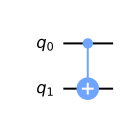

In [11]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

এটি qubits একটি জোড়া প্রয়োগ করা হয়. একটি কন্ট্রোল কিউবিট হিসাবে কাজ করে (এটি ছোট বিন্দু সহ)। অন্যটি *টার্গেট কিউবিট* হিসাবে কাজ করে (বড় বৃত্ত যার ভিতরে একটি `+` আছে)।

CNOT এর প্রভাব ব্যাখ্যা করার একাধিক উপায় রয়েছে। একটি বলা হয় যে এটি তার দুটি ইনপুট বিট দেখে তা একই বা ভিন্ন কিনা। এর পরে, এটি উত্তরের সাথে লক্ষ্য কিউবিটকে ওভাররাইট করে। লক্ষ্য `0` যদি তারা একই হয়, এবং `1` যদি তারা ভিন্ন হয়।


<img src="images/cnot_xor.svg">

CNOT ব্যাখ্যা করার আরেকটি উপায় হল যে নিয়ন্ত্রণ `1` হলে এটি লক্ষ্যে একটি NOT করে, এবং অন্যথায় কিছুই করে না। এই ব্যাখ্যাটি আগেরটির মতোই বৈধ (আসলে, এটিই সেই গেটটির নাম দেয়)।

সম্ভাব্য প্রতিটি ইনপুট চেষ্টা করে নিজের জন্য CNOT আউট চেষ্টা করুন. উদাহরণস্বরূপ, এখানে একটি সার্কিট যা ইনপুট `01` দিয়ে CNOT পরীক্ষা করে।

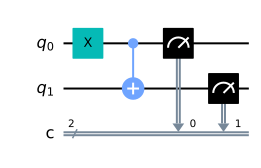

In [12]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

আপনি যদি এই সার্কিটটি চালান, আপনি দেখতে পাবেন যে আউটপুট `11` । আমরা মনে করতে পারি যে এটি নিম্নলিখিত যে কোনও একটি কারণে ঘটছে।

- CNOT ইনপুট মান ভিন্ন কিনা তা গণনা করে এবং খুঁজে পায় যে সেগুলি, যার মানে এটি `1` আউটপুট করতে চায়। এটি qubit 1 (যা মনে রাখবেন, বিট স্ট্রিং এর বাম দিকে আছে) এর উপর লিখে `01` কে `11` এ পরিণত করে এটি করে।

- CNOT দেখতে পাচ্ছে যে qubit 0 স্টেট `1` এ আছে, এবং তাই qubit 1-এ NOT প্রযোজ্য। এটি qubit 1-এর `0` -কে `1` -এ ফ্লিপ করে এবং `01` -কে `11` -এ পরিণত করে।

এখানে CNOT গেটের সমস্ত সম্ভাব্য ইনপুট এবং সংশ্লিষ্ট আউটপুট দেখানো একটি টেবিল রয়েছে:

Input (q1 q0) | Output (q1 q0)
:-: | :-:
00 | 00
01 | 11
10 | 10
11 | 01

আমাদের অর্ধেক যোগকারীর জন্য, আমরা আমাদের ইনপুটগুলির একটিকে ওভাররাইট করতে চাই না। পরিবর্তে, আমরা একটি ভিন্ন জোড়া qubits এ ফলাফল লিখতে চাই। এর জন্য, আমরা দুটি CNOT ব্যবহার করতে পারি।

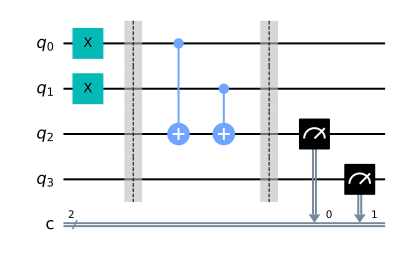

In [13]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

আমরা এখন সম্পূর্ণরূপে কাজ করার অর্ধেক যোগকারীর অর্ধেক পথ। আমাদের কাছে আউটপুটের অন্য বিটটি করা বাকি আছে: যেটি qubit 3-এ থাকবে।

আপনি যদি চারটি সম্ভাব্য যোগফলের দিকে আবার তাকান, আপনি লক্ষ্য করবেন যে শুধুমাত্র একটি ক্ষেত্রেই এটি `0` এর পরিবর্তে `1` হল : `1+1` = `10` । এটি তখনই ঘটে যখন আমরা যে দুটি বিট যোগ করছি তা `1` হয়।

আউটপুটের এই অংশটি গণনা করার জন্য, আমরা কেবলমাত্র আমাদের কম্পিউটারটি দেখতে পেতে পারি যে উভয় ইনপুট `1` কিনা। যদি তারা হয় - এবং শুধুমাত্র যদি তারা হয় - আমাদের qubit 3 এ একটি NOT গেট করতে হবে। এটি শুধুমাত্র এই ক্ষেত্রের জন্য `1` এর প্রয়োজনীয় মানে ফ্লিপ করবে, আমাদের প্রয়োজনীয় আউটপুট দেবে।

এর জন্য, আমাদের একটি নতুন গেট দরকার: একটি CNOT এর মতো তবে একটির পরিবর্তে দুটি কিউবিটে নিয়ন্ত্রিত। এটি লক্ষ্য কিউবিটে একটি NOT সঞ্চালন করবে শুধুমাত্র যখন উভয় নিয়ন্ত্রণ `1` অবস্থায় থাকবে। এই নতুন [গেটটিকে টফলি](gloss:toffoli) বলা হয়। আপনারা যারা বুলিয়ান লজিক গেটগুলির সাথে পরিচিত তাদের জন্য এটি মূলত একটি AND গেট।

কিস্কিট-এ, `ccx` কমান্ড দিয়ে উপস্থাপন করা হয়।

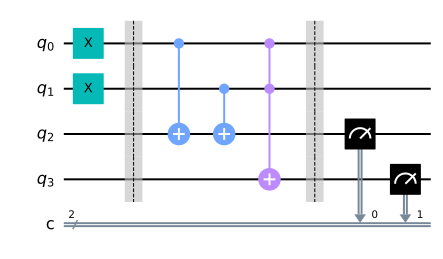

In [14]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

এই উদাহরণে, আমরা `1+1` গণনা করছি, কারণ দুটি ইনপুট বিট উভয়ই `1` । দেখা যাক আমরা কি পেতে.

/home/divs/.local/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


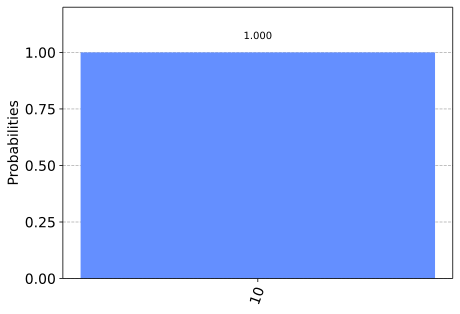

In [15]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

ফলাফল হল `10` , যা সংখ্যা 2 এর বাইনারি উপস্থাপনা। আমরা একটি কম্পিউটার তৈরি করেছি যা 1+1 এর বিখ্যাত গাণিতিক সমস্যা সমাধান করতে পারে!

এখন আপনি অন্য তিনটি সম্ভাব্য ইনপুট দিয়ে এটি চেষ্টা করে দেখতে পারেন এবং দেখান যে আমাদের অ্যালগরিদম তাদের জন্যও সঠিক ফলাফল দেয়৷

অর্ধেক সংযোজনকারীতে আপনার সংযোজনের জন্য প্রয়োজনীয় সবকিছু রয়েছে। NOT, CNOT, এবং Toffoli গেট দিয়ে, আমরা এমন প্রোগ্রাম তৈরি করতে পারি যা যেকোনো আকারের সংখ্যার সেট যোগ করে।

এই তিনটি গেটই কম্পিউটিংয়ে অন্য সব কিছু করার জন্য যথেষ্ট। আসলে, আমরা এমনকি CNOT ছাড়া করতে পারি। উপরন্তু, NOT গেটটি শুধুমাত্র `1` মান সহ বিট তৈরি করার জন্য সত্যিই প্রয়োজন। টফোলি গেটটি মূলত গণিতের পরমাণু। এটি হল সবচেয়ে সহজ উপাদান, যেখান থেকে অন্য প্রতিটি সমস্যা সমাধানের কৌশল সংকলন করা যেতে পারে।

আমরা দেখতে পাব, কোয়ান্টাম কম্পিউটিংয়ে আমরা পরমাণুকে বিভক্ত করি।

In [16]:
import qiskit.tools.jupyter
%qiskit_version_table

/home/divs/.local/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


Qiskit Software,Version
qiskit-terra,0.18.2
qiskit-aer,0.9.0
qiskit-ignis,0.6.0
qiskit-ibmq-provider,0.16.0
qiskit-aqua,0.9.5
qiskit,0.30.0
qiskit-nature,0.2.1
qiskit-finance,0.2.1
qiskit-optimization,0.2.2
qiskit-machine-learning,0.2.1
